In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

/home/yyasumizu/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
In /home/yyasumizu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/yyasumizu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/yyasumizu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/yyasumizu/anaconda3/lib/python3.7/site-pa

In [5]:
df = pd.read_csv('./data/GSE107011_Processed_data_TPM_projection.csv', index_col=0).T

In [6]:
df

,NMF_0,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10,NMF_11,NMF_12
DZQV_CD8_naive,0.952018,0.678957,1.083737,0.307318,0.327830,0.674804,0.380762,0.231955,0.747488,0.329262,0.289953,0.918174,0.531148
DZQV_CD8_CM,0.975343,0.679879,0.886738,0.315364,0.346897,0.674574,0.401647,0.244498,0.778889,0.602763,0.305502,0.848996,0.537402
DZQV_CD8_EM,1.000648,0.680075,0.678973,0.326331,0.358586,0.602479,0.467430,0.477952,0.669269,0.872293,0.281508,0.836037,0.539353
DZQV_CD8_TE,0.863861,0.632064,0.638508,0.338584,0.335791,0.555383,0.453949,0.683363,0.570060,0.902394,0.329275,0.757197,0.529768
DZQV_MAIT,0.974022,0.684101,0.702795,0.262993,0.350775,0.646041,0.416704,0.330600,0.748232,0.791773,0.287216,0.811827,0.539577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
X9JD4_PBMC,0.844541,0.744128,0.655126,0.474504,0.377145,0.501552,0.543967,0.439317,0.560214,0.504048,0.753407,0.712974,0.781623
G4YW_PBMC,0.851049,0.694478,0.648717,0.477022,0.383380,0.499153,0.577109,0.451366,0.547880,0.486089,0.855288,0.716521,0.665738
X4DUY_PBMC,0.841845,0.731927,0.663326,0.458691,0.364394,0.512125,0.620490,0.413809,0.573686,0.439322,0.722252,0.741128,0.721726
X36TS_PBMC,0.752198,0.796627,0.571487,0.465305,0.343732,0.490145,0.639950,0.405407,0.529349,0.458178,0.890465,0.689197,0.762982


In [9]:
list_nmf = ['NMF0 IFN', 'NMF1 DC', 'NMF2 Naive T', 'NMF3 Naive B', 'NMF4 Memory B', 'NMF5 ILC', 
'NMF6 FCGR3A Mono', 'NMF7 NK', 'NMF8 Memory CD4T', 'NMF9 CD8T', 'NMF10 CD14 Mono', 'NMF11 Stress', 'NMF12 Megk']

In [10]:
df.columns = list_nmf

In [12]:
list(df.index)

['DZQV_CD8_naive',
 'DZQV_CD8_CM',
 'DZQV_CD8_EM',
 'DZQV_CD8_TE',
 'DZQV_MAIT',
 'DZQV_VD2',
 'DZQV_VD21',
 'DZQV_TFH',
 'DZQV_Treg',
 'DZQV_Th1',
 'DZQV_Th1Th17',
 'DZQV_Th17',
 'DZQV_Th2',
 'DZQV_CD4_naive',
 'DZQV_Progenitor',
 'DZQV_B_naive',
 'DZQV_B_NSM',
 'DZQV_B_Ex',
 'DZQV_B_SM',
 'DZQV_Plasmablasts',
 'DZQV_C_mono',
 'DZQV_I_mono',
 'DZQV_NC_mono',
 'DZQV_NK',
 'DZQV_pDC',
 'DZQV_mDC',
 'DZQV_Neutrophils',
 'DZQV_Basophils',
 'X925L_CD8_naive',
 'X925L_CD8_CM',
 'X925L_CD8_EM',
 'X925L_CD8_TE',
 'X925L_MAIT',
 'X925L_VD2',
 'X925L_VD21',
 'X925L_TFH',
 'X925L_Treg',
 'X925L_Th1',
 'X925L_Th1Th17',
 'X925L_Th17',
 'X925L_Th2',
 'X925L_CD4_naive',
 'X925L_CD4_TE',
 'X925L_Progenitor',
 'X925L_B_naive',
 'X925L_B_NSM',
 'X925L_B_Ex',
 'X925L_B_SM',
 'X925L_Plasmablasts',
 'X925L_C_mono',
 'X925L_I_mono',
 'X925L_NC_mono',
 'X925L_NK',
 'X925L_pDC',
 'X925L_mDC',
 'X925L_Neutrophils',
 'X925L_Basophils',
 'X9JD4_CD8_naive',
 'X9JD4_CD8_CM',
 'X9JD4_CD8_EM',
 'X9JD4_CD8_TE',
 'X9

In [74]:
list_sample = ['DZQV_CD8_naive',
 'DZQV_CD8_CM',
 'DZQV_CD8_EM',
 'DZQV_CD8_TE',
 'DZQV_TFH',
 'DZQV_Treg',
 'DZQV_Th1',
 'DZQV_Th1Th17',
 'DZQV_Th17',
 'DZQV_Th2',
 'DZQV_CD4_naive',
 'DZQV_B_naive',
 'DZQV_B_NSM',
 'DZQV_B_Ex',
 'DZQV_B_SM',
 'DZQV_C_mono',
 'DZQV_I_mono',
 'DZQV_NC_mono',
 'DZQV_NK',
 'DZQV_pDC',
 'DZQV_mDC',
 'X925L_CD8_naive',
 'X925L_CD8_CM',
 'X925L_CD8_EM',
 'X925L_CD8_TE',
 'X925L_TFH',
 'X925L_Treg',
 'X925L_Th1',
 'X925L_Th1Th17',
 'X925L_Th17',
 'X925L_Th2',
 'X925L_CD4_naive',
 'X925L_CD4_TE',
 'X925L_B_naive',
 'X925L_B_NSM',
 'X925L_B_Ex',
 'X925L_B_SM',
 'X925L_C_mono',
 'X925L_I_mono',
 'X925L_NC_mono',
 'X925L_NK',
 'X925L_pDC',
 'X925L_mDC',
 'X9JD4_CD8_naive',
 'X9JD4_CD8_CM',
 'X9JD4_CD8_EM',
 'X9JD4_CD8_TE',
 'X9JD4_TFH',
 'X9JD4_Treg',
 'X9JD4_Th1',
 'X9JD4_Th1Th17',
 'X9JD4_Th17',
 'X9JD4_Th2',
 'X9JD4_CD4_naive',
 'X9JD4_CD4_TE',
 'X9JD4_B_naive',
 'X9JD4_B_NSM',
 'X9JD4_B_Ex',
 'X9JD4_B_SM',
 'X9JD4_C_mono',
 'X9JD4_I_mono',
 'X9JD4_NC_mono',
 'X9JD4_NK',
 'X9JD4_pDC',
 'X9JD4_mDC',
 'G4YW_CD8_naive',
 'G4YW_CD8_CM',
 'G4YW_CD8_EM',
 'CYFZ_PBMC',
 'FY2H_PBMC',
 'FLWA_PBMC',
 'X453W_PBMC',
 'X684C_PBMC',
 'CZJE_PBMC',
 'G4YW_CD8_TE',
 'G4YW_TFH',
 'G4YW_Treg',
 'G4YW_Th1',
 'G4YW_Th1Th17',
 'G4YW_Th17',
 'G4YW_Th2',
 'G4YW_CD4_naive',
 'G4YW_B_naive',
 'G4YW_B_NSM',
 'G4YW_B_Ex',
 'G4YW_B_SM',
 'G4YW_C_mono',
 'G4YW_I_mono',
 'G4YW_NC_mono',
 'G4YW_NK',
 'G4YW_pDC',
 'G4YW_mDC',
 'DZQV_PBMC',
 'X925L_PBMC',
 'X9JD4_PBMC',
 'G4YW_PBMC',
 'X4DUY_PBMC',
 'X36TS_PBMC',
 'CR3L_PBMC']

In [75]:
df_sample = pd.DataFrame(list_sample, columns = ['ID'])

In [76]:
df_sample

,ID
0,DZQV_CD8_naive
1,DZQV_CD8_CM
2,DZQV_CD8_EM
3,DZQV_CD8_TE
4,DZQV_TFH
...,...
94,X9JD4_PBMC
95,G4YW_PBMC
96,X4DUY_PBMC
97,X36TS_PBMC


In [77]:
df_sample['cell'] = df_sample.ID.str.split('_').str.get(1) 

In [78]:
df_sample

,ID,cell
0,DZQV_CD8_naive,CD8
1,DZQV_CD8_CM,CD8
2,DZQV_CD8_EM,CD8
3,DZQV_CD8_TE,CD8
4,DZQV_TFH,TFH
...,...,...
94,X9JD4_PBMC,PBMC
95,G4YW_PBMC,PBMC
96,X4DUY_PBMC,PBMC
97,X36TS_PBMC,PBMC


In [79]:
df_sample.cell.unique()

array(['CD8', 'TFH', 'Treg', 'Th1', 'Th1Th17', 'Th17', 'Th2', 'CD4', 'B',
       'C', 'I', 'NC', 'NK', 'pDC', 'mDC', 'PBMC'], dtype=object)

In [80]:
dict_cell = {'CD8' : 0, 'TFH' :1, 'Treg':1, 'Th1':1, 'Th1Th17':1, 'Th17':1, 'Th2':1, 'CD4':1, 'B':2,
       'C':3, 'I':3, 'NC':3, 'NK':4, 'pDC':5, 'mDC':5, 'PBMC':6}

In [81]:
cp = sns.color_palette("hls", 7)
list_colors = [cp[dict_cell[x]] for x in df_sample['cell']]

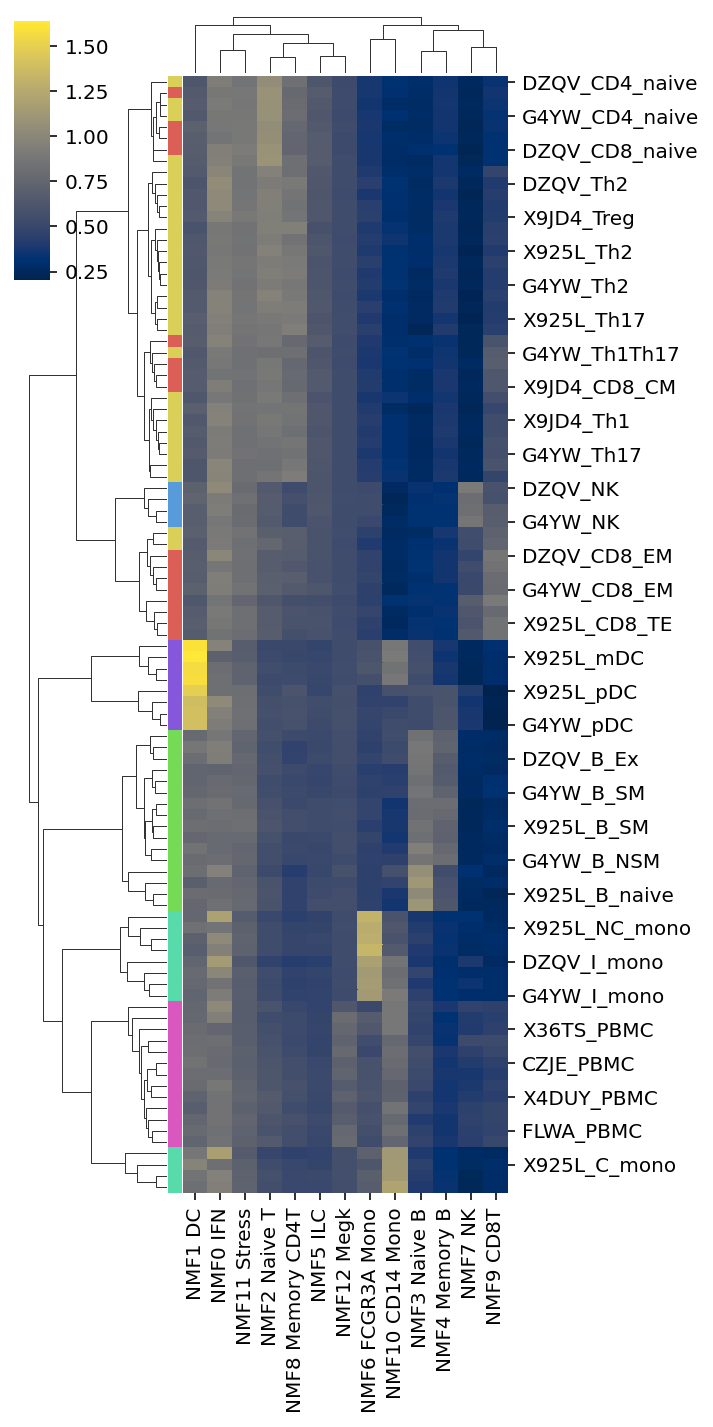

In [82]:
sns.clustermap(df.loc[df_sample.ID], figsize=(5,10), dendrogram_ratio=(.3,.05), cmap='cividis', row_colors=list_colors)

In [54]:
cp

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.8169142857142857, 0.33999999999999997),
 (0.4573714285714283, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.6683428571428571),
 (0.33999999999999997, 0.6059428571428571, 0.86),
 (0.5197714285714281, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7545142857142858)]

## Single-Cell

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.8.0 umap==0.5.1 numpy==1.21.5 scipy==1.7.3 pandas==1.3.3 scikit-learn==1.0.2 statsmodels==0.12.0 python-igraph==0.9.6 louvain==0.6.1 pynndescent==0.5.4


In [113]:
from NMFprojection import *

In [99]:
adata = sc.datasets.ebi_expression_atlas("E-MTAB-9221")

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

0.00B [00:00, ?B/s]

Downloaded E-MTAB-9221 to /mnt/media32TB/home/yyasumizu/bioinformatics/yyoshiaki-git/2023_schack/data/E-MTAB-9221


In [109]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ['hgnc_symbol', "ensembl_gene_id"],
    )
annot = annot.drop_duplicates(subset='hgnc_symbol').drop_duplicates(subset='ensembl_gene_id').set_index("ensembl_gene_id")

In [110]:
adata.var[annot.columns] = annot.reindex(adata.var.index)
adata.var.index = adata.var['hgnc_symbol']
adata = adata[:,~adata.var.index.isna()]

In [121]:
adata.var

,hgnc_symbol
hgnc_symbol,
TSPAN6,TSPAN6
DPM1,DPM1
SCYL3,SCYL3
C1orf112,C1orf112
FGR,FGR
...,...
H2AC18,H2AC18
H2AC19,H2AC19
PPIAL4C,PPIAL4C


In [118]:
adata

AnnData object with n_obs × n_vars = 6807 × 20522
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[clinical history]', 'Sample Characteristic Ontology Term[clinical history]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Factor Value[disease]', 'Factor Value Ontology Term[disease]', 'Factor Value[clinical history]', 'Factor Value Ontology Term[clinical history]', 'Factor Value[sampling time point]', 'Factor Value Ontology Term[sampling time point]', 'Fact

In [104]:
fixed_W = pd.read_csv('./data/NMF.W.PBMC.csv', 
                      index_col=0)

In [122]:
X = adata.to_df().T

In [123]:
X.head()

,SAMEA6979313-AAACCCAAGACTCAAA,SAMEA6979313-AAAGAACCACCTGCTT,SAMEA6979313-AAAGGATGTCCCTCAT,SAMEA6979313-AAAGGGTGTCCCTCAT,SAMEA6979313-AAAGGTTGTCCCTCAT,SAMEA6979313-AACAGGGAGATCACTC,SAMEA6979313-AACCAACGTGTGAGCA,SAMEA6979313-AACCATGAGCAGCGAT,SAMEA6979313-AACCCAAAGTATGATG,SAMEA6979313-AACCCAAGTTAAACCC,...,SAMEA6979322-TTGGTTTCACTGATTG,SAMEA6979322-TTGGTTTTCCAAGGGA,SAMEA6979322-TTGTTTGCACACACTA,SAMEA6979322-TTGTTTGGTACGATGG,SAMEA6979322-TTTACTGCAAGCGAAC,SAMEA6979322-TTTCCTCTCAACCTCC,SAMEA6979322-TTTCGATAGATTAGAC,SAMEA6979322-TTTGATCCAATAGTGA,SAMEA6979322-TTTGGTTAGAATTGTG,SAMEA6979322-TTTGGTTCATTGTGCA
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DPM1,0.0,0.0,1.082781,0.0,0.0,2.0,0.0,2.0,0.0,1.069105,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
SCYL3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1orf112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FGR,2.0,0.0,9.000000,2.0,1.0,0.0,0.0,10.0,0.0,9.000000,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0


In [124]:
X_norm, df_H, fixed_W_trunc  = NMFprojection(X, fixed_W, normalized=False)

In [125]:
adata.obs = pd.concat([adata.obs, df_H.T], axis=1)

In [128]:
for k,v in zip(['NMF_{}'.format(i) for i in range(13)], list_nmf):
    adata.obs[v] = adata.obs[k]

In [129]:
adata

AnnData object with n_obs × n_vars = 6807 × 17456
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[clinical history]', 'Sample Characteristic Ontology Term[clinical history]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Factor Value[disease]', 'Factor Value Ontology Term[disease]', 'Factor Value[clinical history]', 'Factor Value Ontology Term[clinical history]', 'Factor Value[sampling time point]', 'Factor Value Ontology Term[sampling time point]', 'Fact

In [130]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

filtered out 1017 cells that have less than 200 genes expressed
filtered out 9 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [133]:
adata.obs.columns

Index(['Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[developmental stage]',
       'Sample Characteristic Ontology Term[developmental stage]',
       'Sample Characteristic[sex]',
       'Sample Characteristic Ontology Term[sex]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[disease]',
       'Sample Characteristic Ontology Term[disease]',
       'Sample Characteristic[clinical history]',
       'Sample Characteristic Ontology Term[clinical history]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Factor Value[disease]', 'Factor Value Ontology Term[disease]',
       'Factor Value[clinical history]',
       'Factor Value Ontology Term[clinical history]',
       'Factor Valu

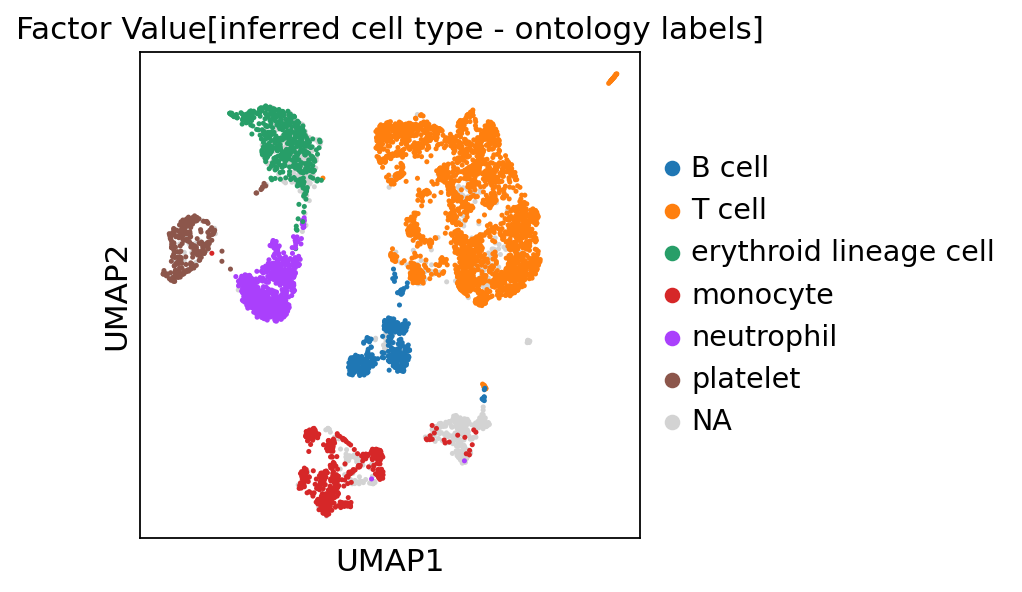

In [134]:
sc.pl.umap(adata, color=['Factor Value[inferred cell type - ontology labels]'])

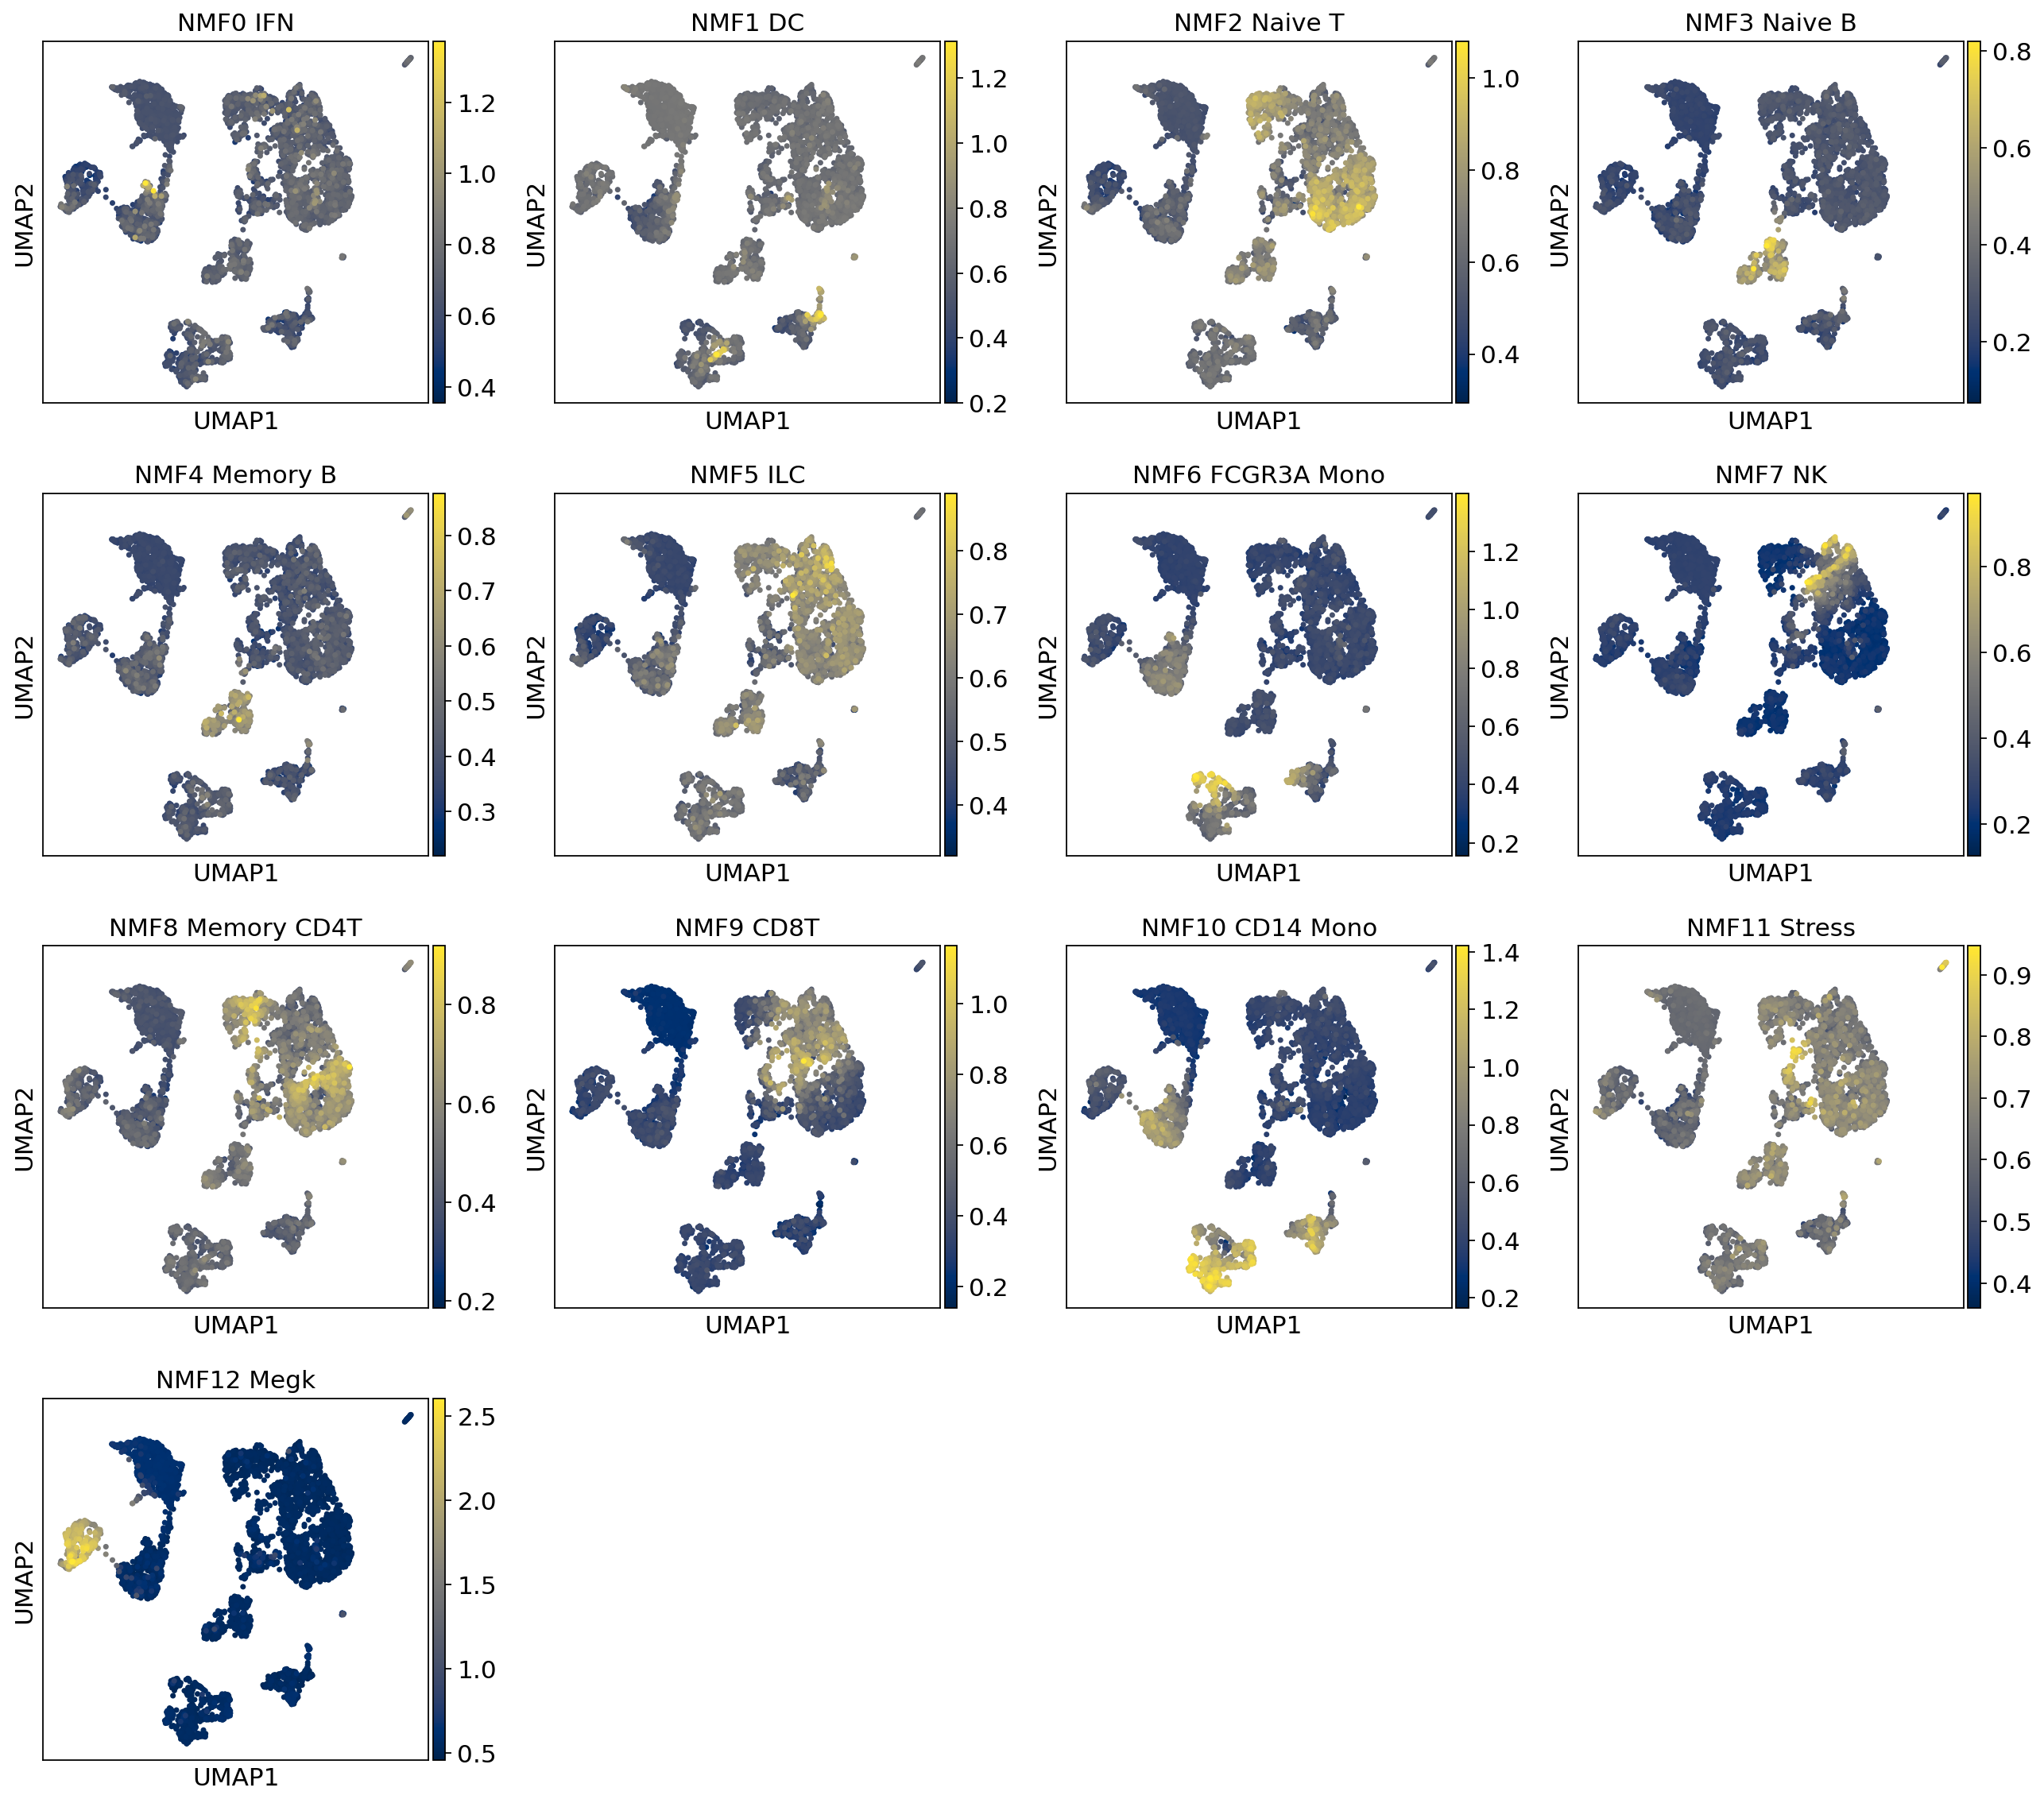

In [141]:
sc.pl.umap(adata, color=list_nmf, cmap='cividis', s=40)